In [232]:
module RobotWorld

    using Plots
    using Parameters

    @with_kw mutable struct World
        objects = []
        sampling_time::Float64 = 0.01
    end

    @with_kw mutable struct IdealRobot
        pose::Array{Float64}
        color::Symbol
        r::Float64
        IdealRobot(pose, color, r) = new(pose, color, r)
    end

    function state_transition(nu, omega, time, pose)
        t0 = pose[3]
        if abs(omega) < 1^(-10)
            return pose + [nu * cos(t0), nu * sin(t0), omega] .* time
        else
            return pose + [nu / omega * (sin(t0 + omega*time) - sin(t0)), nu/omega*(-cos(t0+omega*time)+cos(t0)), omega*time]
        end
    end

    function append(self::World, obj::IdealRobot)
        push!(self.objects, deepcopy(obj))
    end

    function circle_shape(x, y, r)
        theta = LinRange(0, 2pi, 500)
        x .+ r * sin.(theta), y .+ r * cos.(theta)
    end

    function draw(self::World)

        # initialize a plot
        plt = plot(
            1,
            label="", 
            aspectratio=1,
            xlim=(-5, 5),
            ylim=(-5, 5),
            xlabel="X", 
            ylabel="Y"
        )
    
        anim = Animation()
        for i=1:10
            one_step(self, i, plt, anim)
        end    
        gif(anim, fps = 10)
        
    end

    function draw(self::IdealRobot, plt)
        x, y, theta = self.pose
        xn = x + self.r * cos(theta)
        yn = y + self.r * sin(theta)
        plot!(plt, [x, xn], [y, yn], c=self.color, label="")   
        plot!(plt, circle_shape(x, y, self.r), seriestype=[:shape,], c=self.color, linecolor=:black, fillalpha=0.2, aspectratio=1, label="")
    end

    function one_step(self::World, i, plt, anim)        
        plt = plot(plt, annotation = (-3.5, 4.5, "t = "*string((i-1)*self.sampling_time), :black))    
        for obj in self.objects
        
            obj.pose = state_transition(10.0, 10.0, self.sampling_time, obj.pose)
        
            draw(obj, plt)
        end
        frame(anim)
    end

end

Main.RobotWorld

┌ Info: Saved animation to 
│   fn = /home/szmlb/workspace/github/code-practice/julia/detailed_probo/src/tmp.gif
└ @ Plots /home/szmlb/.julia/packages/Plots/FI0vT/src/animation.jl:114


Plots.AnimatedGif("/home/szmlb/workspace/github/code-practice/julia/detailed_probo/src/tmp.gif")
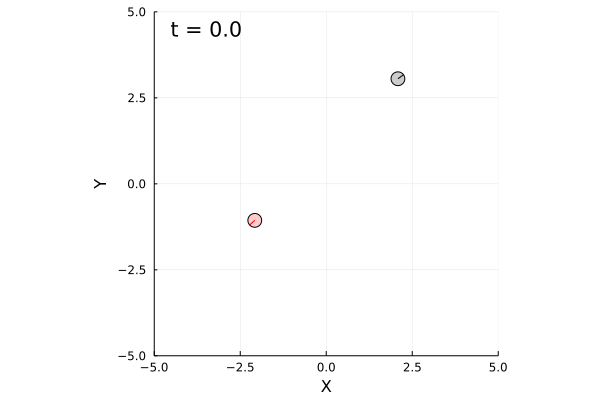

In [233]:
using .RobotWorld
world = RobotWorld.World()

robot1 = RobotWorld.IdealRobot([2, 3, pi/6], :black, 0.2)
robot2 = RobotWorld.IdealRobot([-2, -1, pi/5*6], :red, 0.2)

RobotWorld.append(world, robot1)
RobotWorld.append(world, robot2)
RobotWorld.draw(world)